In [2]:
from src.FullFeatureSet import FullFeatureSet
from src.ManuallySelectedFeatureSet import ManuallySelectedFeatureSet
from src.PcaFeatureSet import PcaFeatureSet
from src.SomModelRunner import SomModelRunner
from src.uci_har_dataset import UciHarDataset
import itertools

%load_ext autoreload
%autoreload 2

In [3]:
dataset = UciHarDataset()
full_features = FullFeatureSet(dataset)
manual_features= ManuallySelectedFeatureSet(dataset)
pca_features = PcaFeatureSet(dataset, n_components=10)

Loaded activity labels from data/UCI-HAR Dataset//activity_labels.txt
{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
Loaded feature names from data/UCI-HAR Dataset//features.txt
Loaded features from data/UCI-HAR Dataset/train/X_train.txt. Shape: (7352, 561)
Loaded labels from data/UCI-HAR Dataset/train/y_train.txt. Shape: (7352, 1)
Loaded features from data/UCI-HAR Dataset/test/X_test.txt. Shape: (2947, 561)
Loaded labels from data/UCI-HAR Dataset/test/y_test.txt. Shape: (2947, 1)
Selected features: train. Shape: (7352, 15)
Selected features: test. Shape: (2947, 15)
Scaled features using StandardScaler.


In [ ]:
feature_configs = {
    "Full (561)": full_features,
    "Manual (15)": manual_features,
    "PCA (80%)": pca_features,
}

param_grid = {
    'grid_size': [4, 6, 8, 10, 20],
    'sigma': [0.2, 0.4, 0.6],
    'lr': [0.5],
}

results = []
all_results = []

for name, f_set in feature_configs.items():
    print(f"\n--- Grid Search: {name} ---")
    best_qe = 100
    best_acc = 0
    best_te = 100
    best_params = None

    keys, values = zip(*param_grid.items())
    combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
    best_result = {}

    for params in combinations:
        runner = SomModelRunner(
            dataset=dataset,
            feature_set=f_set,
            x_size = params['grid_size'],
            y_size = params['grid_size'],
            sigma = params['sigma'] * params['grid_size'],
            lr = params['lr'],
            name=f"{name} {params}"
        )
        qe, te, sc = runner.run(iterations=5000, num_examples=2000)
        # acc = runner.evaluate_test_set()

        result = {
            'feature_set_name': name,
            'best_accuracy': best_acc,
            'best_te': qe,
            'best_qe': te,
            'best_params': params,
            'feature_set_obj': f_set
        }
        all_results.append(result)

        if qe < best_qe and te < 0.1:
            best_result = result

    results.append(best_result)

print("\n" + "="*30)
print("FINAL RESULTS")
print("="*30)

for res in results:
    print(f"Set: {res['feature_set_name']} | Params: {res['best_params']}")

    # # Re-run the winner with full plots
    # best_svm = SVC(**res['best_params'])
    # final_runner = SvmRunner(dataset, res['feature_set_obj'], best_svm, name=res['feature_set_name'])
    # final_runner.run()
    # # final_runner.plot_confusion_matrix() # Uncomment if you want all plots at once


--- Grid Search: Full (561) ---
[Full (561) {'grid_size': 4, 'sigma': 0.2, 'lr': 0.5}]QE:4.2766 | TE:0.5110 | ACC:0.7838
[Full (561) {'grid_size': 4, 'sigma': 0.4, 'lr': 0.5}]QE:4.3752 | TE:0.1955 | ACC:0.6905
[Full (561) {'grid_size': 4, 'sigma': 0.6, 'lr': 0.5}]QE:4.5566 | TE:0.0835 | ACC:0.7727
[Full (561) {'grid_size': 6, 'sigma': 0.2, 'lr': 0.5}]QE:3.8785 | TE:0.3835 | ACC:0.7530
[Full (561) {'grid_size': 6, 'sigma': 0.4, 'lr': 0.5}]QE:4.2761 | TE:0.1185 | ACC:0.7784
[Full (561) {'grid_size': 6, 'sigma': 0.6, 'lr': 0.5}]QE:4.4612 | TE:0.0475 | ACC:0.7479
[Full (561) {'grid_size': 8, 'sigma': 0.2, 'lr': 0.5}]QE:3.7892 | TE:0.2660 | ACC:0.7360
[Full (561) {'grid_size': 8, 'sigma': 0.4, 'lr': 0.5}]QE:4.2063 | TE:0.0930 | ACC:0.7910
[Full (561) {'grid_size': 8, 'sigma': 0.6, 'lr': 0.5}]QE:4.3829 | TE:0.0665 | ACC:0.7879
[Full (561) {'grid_size': 10, 'sigma': 0.2, 'lr': 0.5}]QE:3.6901 | TE:0.2450 | ACC:0.8090
[Full (561) {'grid_size': 10, 'sigma': 0.4, 'lr': 0.5}]QE:4.1576 | TE:0.0900

PCA
[Runner]QE:2.4483 | TE:0.0510 | ACC:0.7475


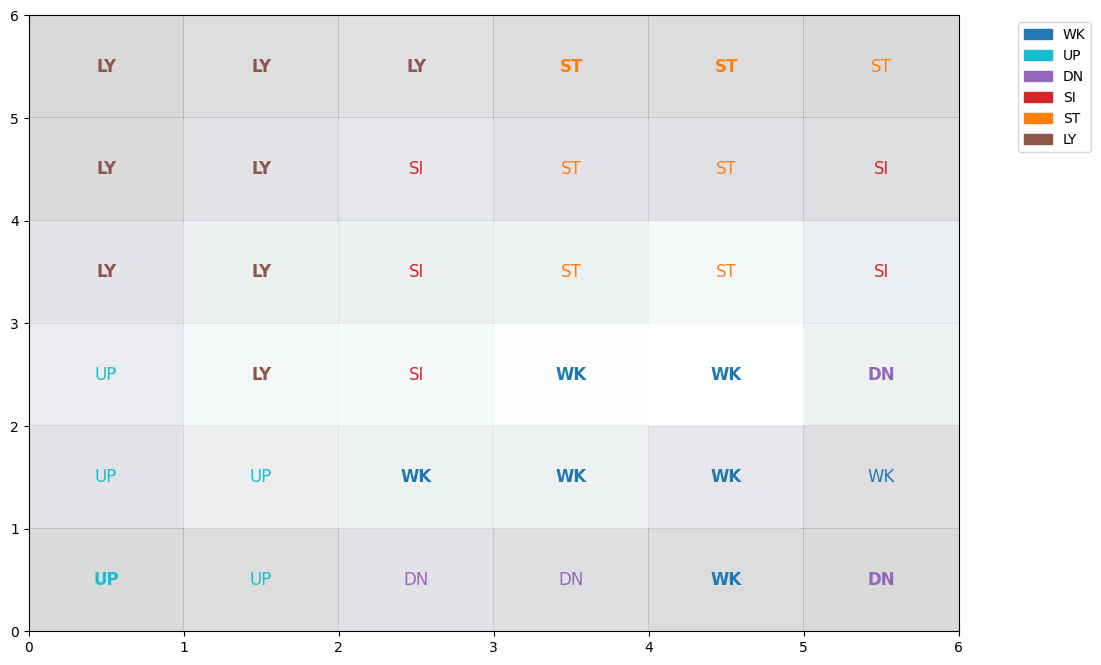

Test Accuracy: 0.7475
Silhouette Score: 0.19048547232215784
                    precision    recall  f1-score   support

           WALKING       0.72      0.60      0.65       496
  WALKING_UPSTAIRS       0.84      0.84      0.84       471
WALKING_DOWNSTAIRS       0.57      0.70      0.63       420
           SITTING       0.76      0.46      0.57       491
          STANDING       0.65      0.89      0.75       532
            LAYING       0.99      0.97      0.98       537

          accuracy                           0.75      2947
         macro avg       0.75      0.74      0.74      2947
      weighted avg       0.76      0.75      0.74      2947



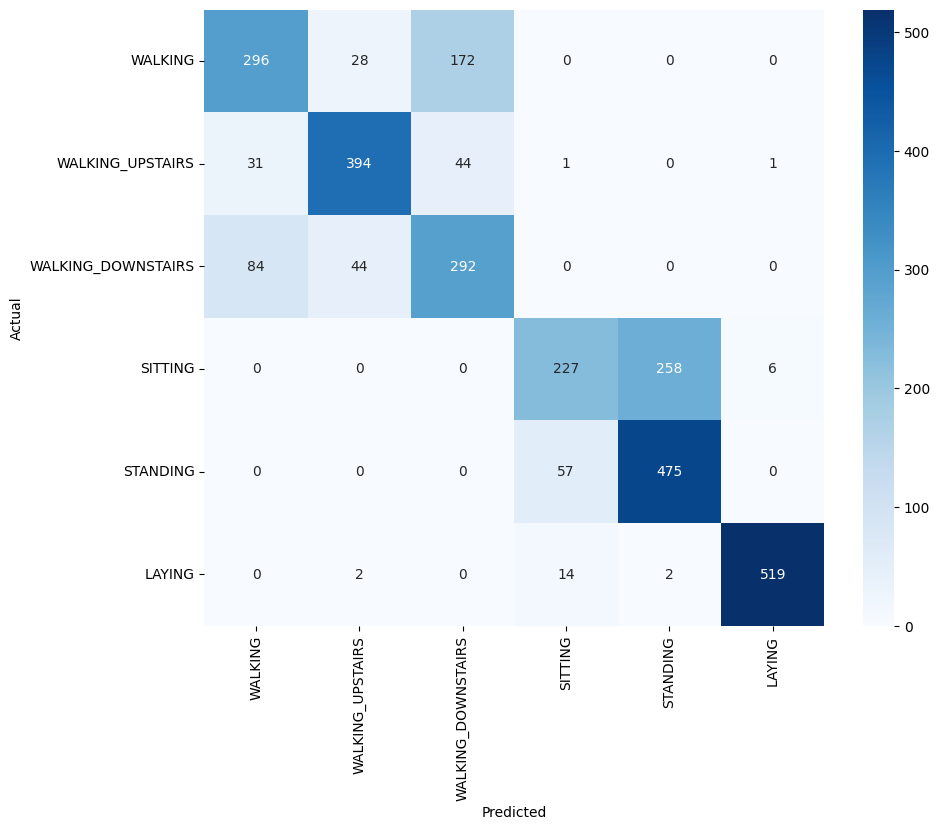

--- Purity Report for Runner ---
Average Neuron Purity: 0.8042
Percentage of 'Pure' Neurons (>90% same label): 30.56%
[Runner]QE:2.8049 | TE:0.1502 | ACC:0.6098
Test Accuracy: 0.6098
Silhouette Score: 0.14487120873033021
                    precision    recall  f1-score   support

           WALKING       0.51      0.70      0.59       496
  WALKING_UPSTAIRS       0.43      0.57      0.49       471
WALKING_DOWNSTAIRS       0.84      0.19      0.31       420
           SITTING       0.56      0.39      0.46       491
          STANDING       0.67      0.70      0.69       532
            LAYING       0.82      1.00      0.90       537

          accuracy                           0.61      2947
         macro avg       0.64      0.59      0.57      2947
      weighted avg       0.64      0.61      0.59      2947



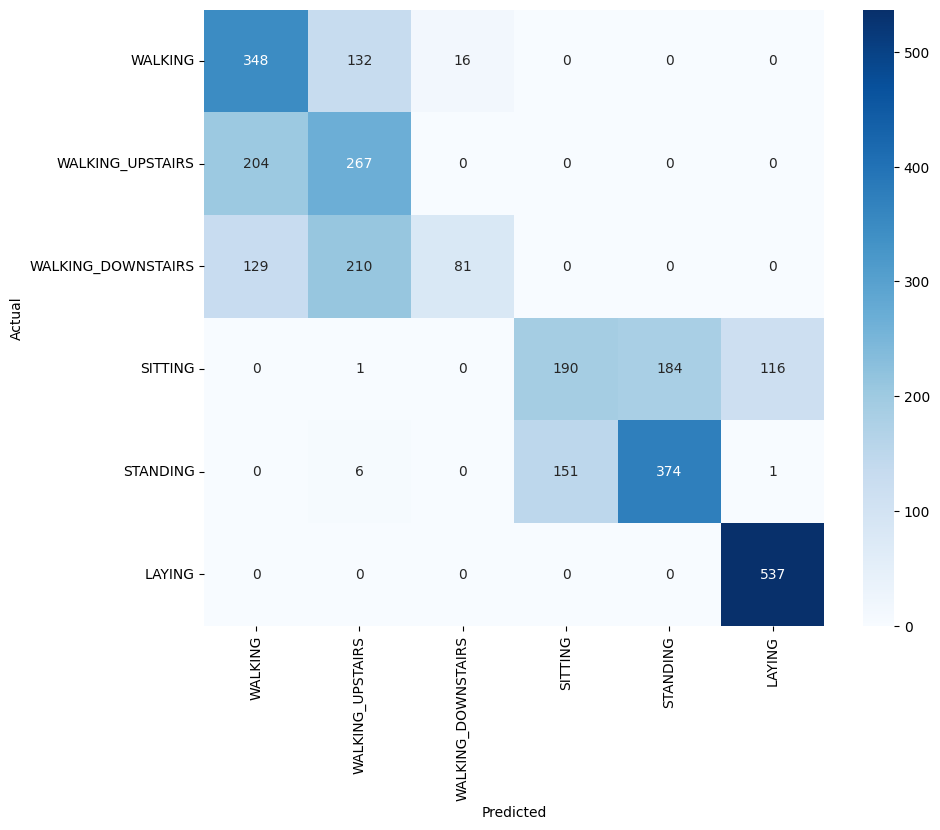

--- Purity Report for Runner ---
Average Neuron Purity: 0.7714
Percentage of 'Pure' Neurons (>90% same label): 31.25%


In [9]:
print("PCA")
runner = SomModelRunner(dataset, feature_set=pca_features,
                        x_size=6,
                        y_size=6,
                        sigma=2.4,
                        lr=0.5,
                        topology='rectangular')
runner.run(iterations=5000)
runner.plot_labeled_grid(filename='fig/som_pca_labeled_grid.svg')
runner.evaluate_test_set(verbose=True)
runner.check_cluster_purity()

runner = SomModelRunner(dataset, feature_set=pca_features,
                        x_size=4,
                        y_size=4,
                        sigma=1.6,
                        lr=0.5,
                        topology='rectangular')
runner.run(iterations=5000)
# runner.plot_labeled_grid()
runner.evaluate_test_set(verbose=True)
runner.check_cluster_purity()

FULL
[Runner]QE:4.6749 | TE:0.1538 | ACC:0.6583
Test Accuracy: 0.6583
Silhouette Score: 0.08403460729546146
                    precision    recall  f1-score   support

           WALKING       0.58      0.47      0.52       496
  WALKING_UPSTAIRS       0.59      0.84      0.70       471
WALKING_DOWNSTAIRS       0.71      0.51      0.59       420
           SITTING       0.60      0.23      0.33       491
          STANDING       0.60      0.85      0.71       532
            LAYING       0.83      0.99      0.90       537

          accuracy                           0.66      2947
         macro avg       0.65      0.65      0.62      2947
      weighted avg       0.65      0.66      0.63      2947



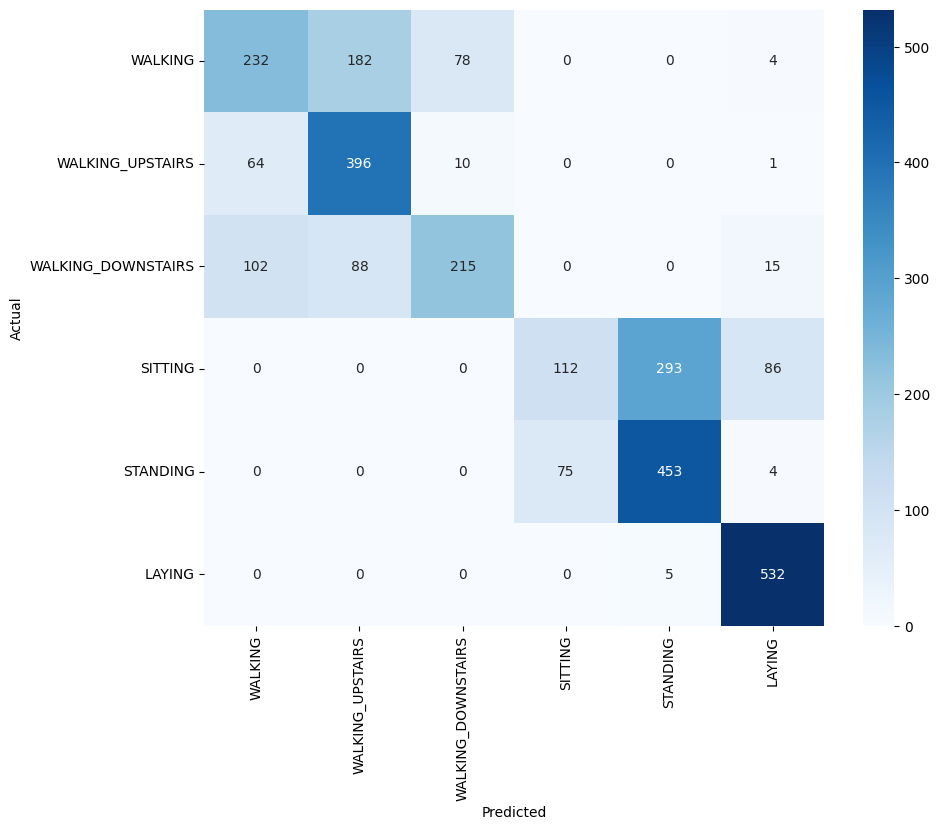

--- Purity Report for Runner ---
Average Neuron Purity: 0.8038
Percentage of 'Pure' Neurons (>90% same label): 47.22%
[Runner]QE:4.9060 | TE:0.2791 | ACC:0.6298
Test Accuracy: 0.6298
Silhouette Score: 0.1056828252062689
                    precision    recall  f1-score   support

           WALKING       0.48      0.78      0.59       496
  WALKING_UPSTAIRS       0.67      0.70      0.68       471
WALKING_DOWNSTAIRS       0.79      0.18      0.30       420
           SITTING       0.55      0.17      0.26       491
          STANDING       0.63      0.86      0.73       532
            LAYING       0.78      0.97      0.87       537

          accuracy                           0.63      2947
         macro avg       0.65      0.61      0.57      2947
      weighted avg       0.65      0.63      0.58      2947



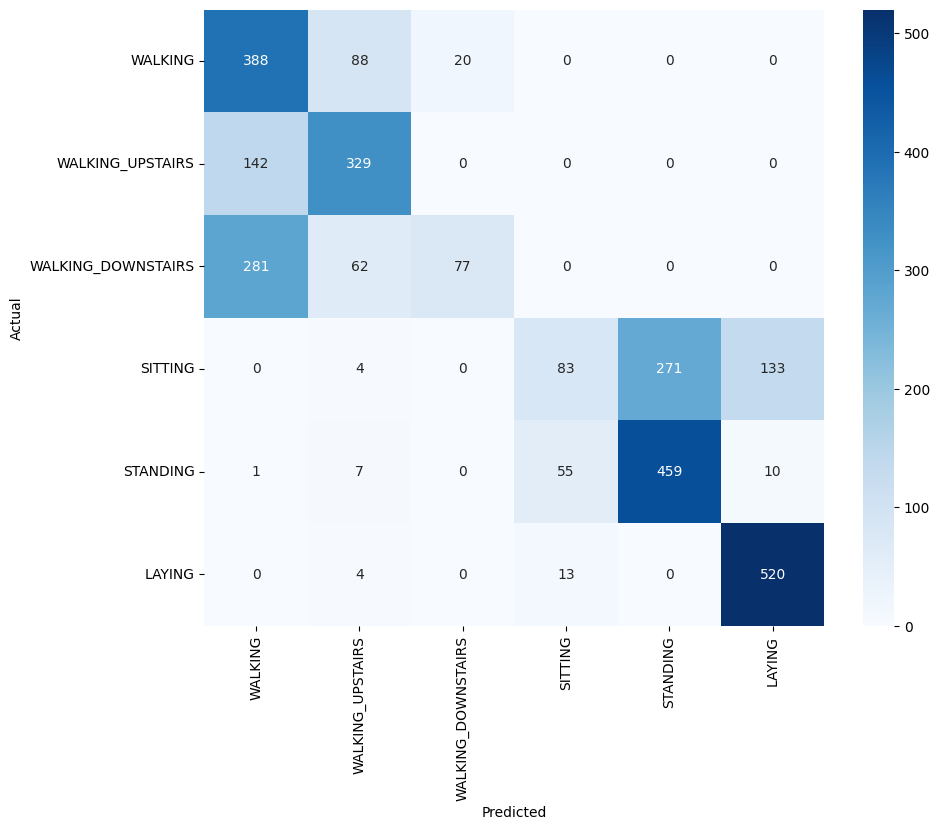

--- Purity Report for Runner ---
Average Neuron Purity: 0.7762
Percentage of 'Pure' Neurons (>90% same label): 43.75%


In [12]:
print("FULL")

runner = SomModelRunner(dataset, feature_set=full_features,
                        x_size=6,
                        y_size=6,
                        sigma=3.6,
                        lr=0.5,
                        topology='rectangular')
runner.run(iterations=5000)
# runner.plot_labeled_grid()
runner.evaluate_test_set(verbose=True)
runner.check_cluster_purity()

runner = SomModelRunner(dataset, feature_set=full_features,
                        x_size=4,
                        y_size=4,
                        sigma=2.4,
                        lr=0.5,
                        topology='rectangular')
runner.run(iterations=5000)
# runner.plot_labeled_grid()
runner.evaluate_test_set(verbose=True)
runner.check_cluster_purity()

[Runner]QE:1.6608 | TE:0.0585 | ACC:0.6922
Test Accuracy: 0.6922
Silhouette Score: 0.12935626147037033
                    precision    recall  f1-score   support

           WALKING       0.67      0.73      0.70       496
  WALKING_UPSTAIRS       0.51      0.80      0.62       471
WALKING_DOWNSTAIRS       0.76      0.22      0.34       420
           SITTING       0.67      0.67      0.67       491
          STANDING       0.68      0.67      0.68       532
            LAYING       0.99      0.97      0.98       537

          accuracy                           0.69      2947
         macro avg       0.71      0.68      0.66      2947
      weighted avg       0.72      0.69      0.68      2947



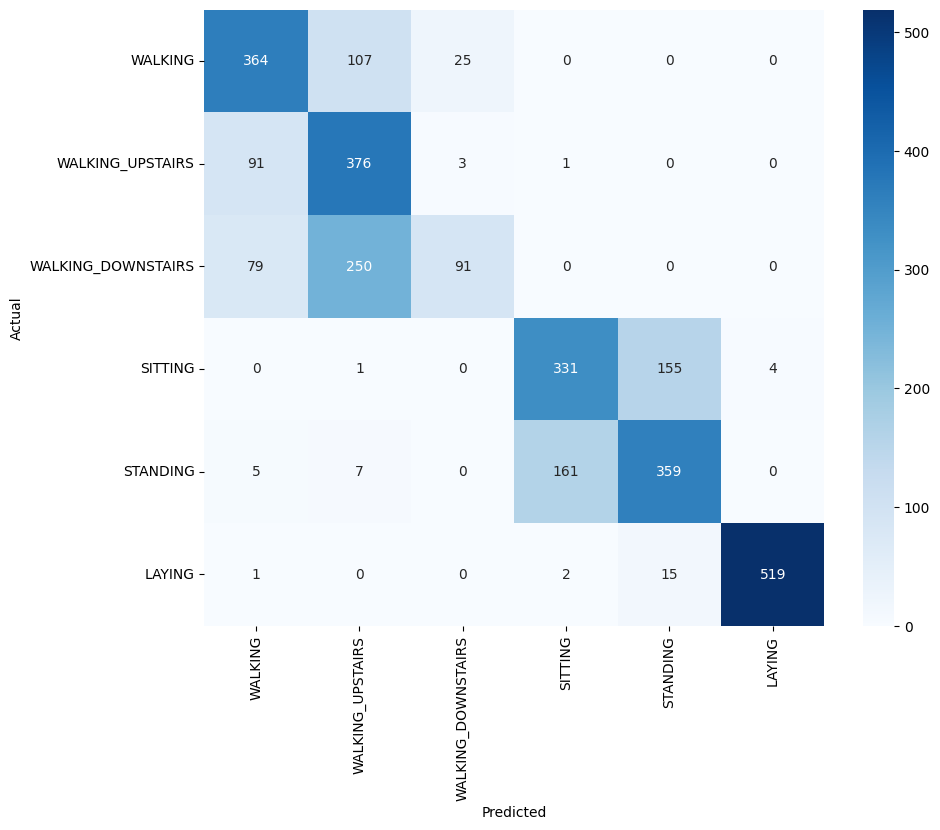

--- Purity Report for Runner ---
Average Neuron Purity: 0.7484
Percentage of 'Pure' Neurons (>90% same label): 27.78%
[Runner]QE:1.8336 | TE:0.0411 | ACC:0.6230
Test Accuracy: 0.6230
Silhouette Score: 0.1802286807339839
                    precision    recall  f1-score   support

           WALKING       0.46      0.74      0.57       496
  WALKING_UPSTAIRS       0.53      0.61      0.56       471
WALKING_DOWNSTAIRS       0.72      0.07      0.13       420
           SITTING       0.79      0.33      0.46       491
          STANDING       0.59      0.97      0.74       532
            LAYING       0.98      0.88      0.93       537

          accuracy                           0.62      2947
         macro avg       0.68      0.60      0.57      2947
      weighted avg       0.68      0.62      0.58      2947



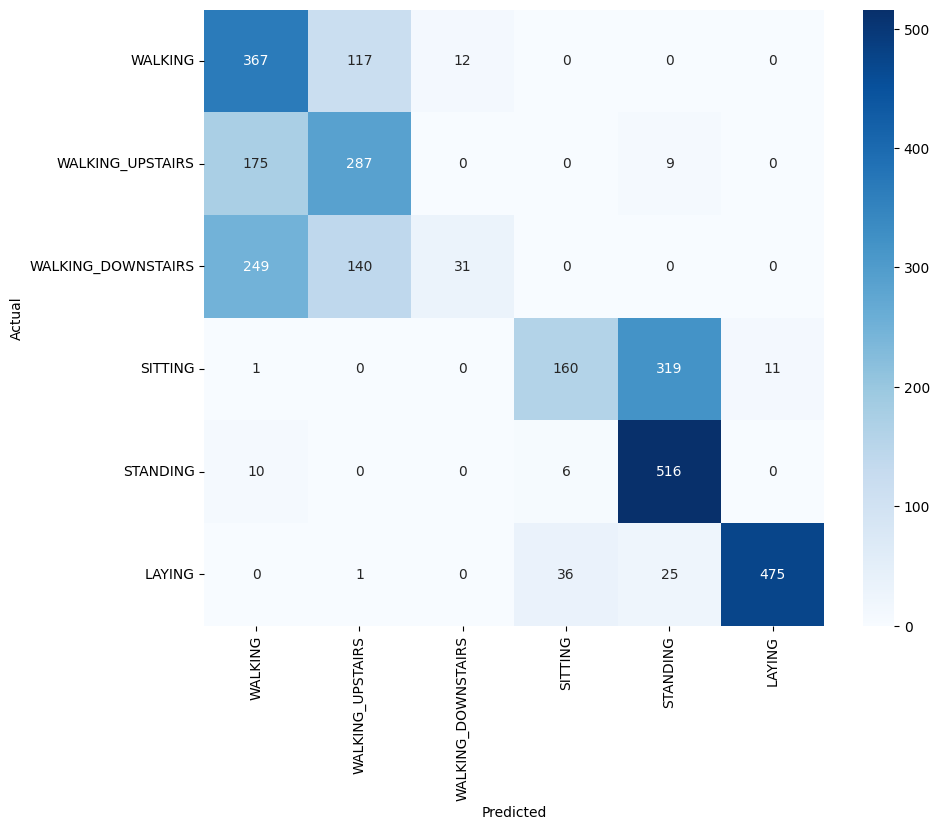

--- Purity Report for Runner ---
Average Neuron Purity: 0.7187
Percentage of 'Pure' Neurons (>90% same label): 25.00%


In [13]:
runner = SomModelRunner(dataset, feature_set=manual_features,
                        x_size=6,
                        y_size=6,
                        sigma=2.4,
                        lr=0.5,
                        topology='rectangular')
runner.run(iterations=5000)
# runner.plot_labeled_grid()
runner.evaluate_test_set(verbose=True)
runner.check_cluster_purity()
runner = SomModelRunner(dataset, feature_set=manual_features,
                        x_size=4,
                        y_size=4,
                        sigma=1.6,
                        lr=0.5,
                        topology='rectangular')
runner.run(iterations=5000)
# runner.plot_labeled_grid()
runner.evaluate_test_set(verbose=True)
runner.check_cluster_purity()

